* Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
* X1 = my order was delivered on time
* X2 = contents of my order was as I expected
* X3 = I ordered everything I wanted to order
* X4 = I paid a good price for my order
* X5 = I am satisfied with my courier
* X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

In [3]:
data= pd.read_csv('/content/gdrive/MyDrive/ACME-HappinessSurvey2020.csv')

In [4]:
data

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


We have a binary target with 2 levels. And 6 dependent variables with five level. 

Considering the type of dependent and independent variables in my dataset, it makes perfect sense to build a tree-based model at first.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


There is any missing value.

In [6]:
data.Y.value_counts()

1    69
0    57
Name: Y, dtype: int64

 Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes. Also, the dataset isn't large, so I can chose decision tree as the base model. 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y=data.Y
X=data.drop(['Y'],axis=1)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,shuffle=True,stratify=y)

In [21]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.metrics import classification_report
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifer
clf1 = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.73      0.79      0.76        14

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



I prefer to observe which feature is better. I will drop some variables from the model respectively.

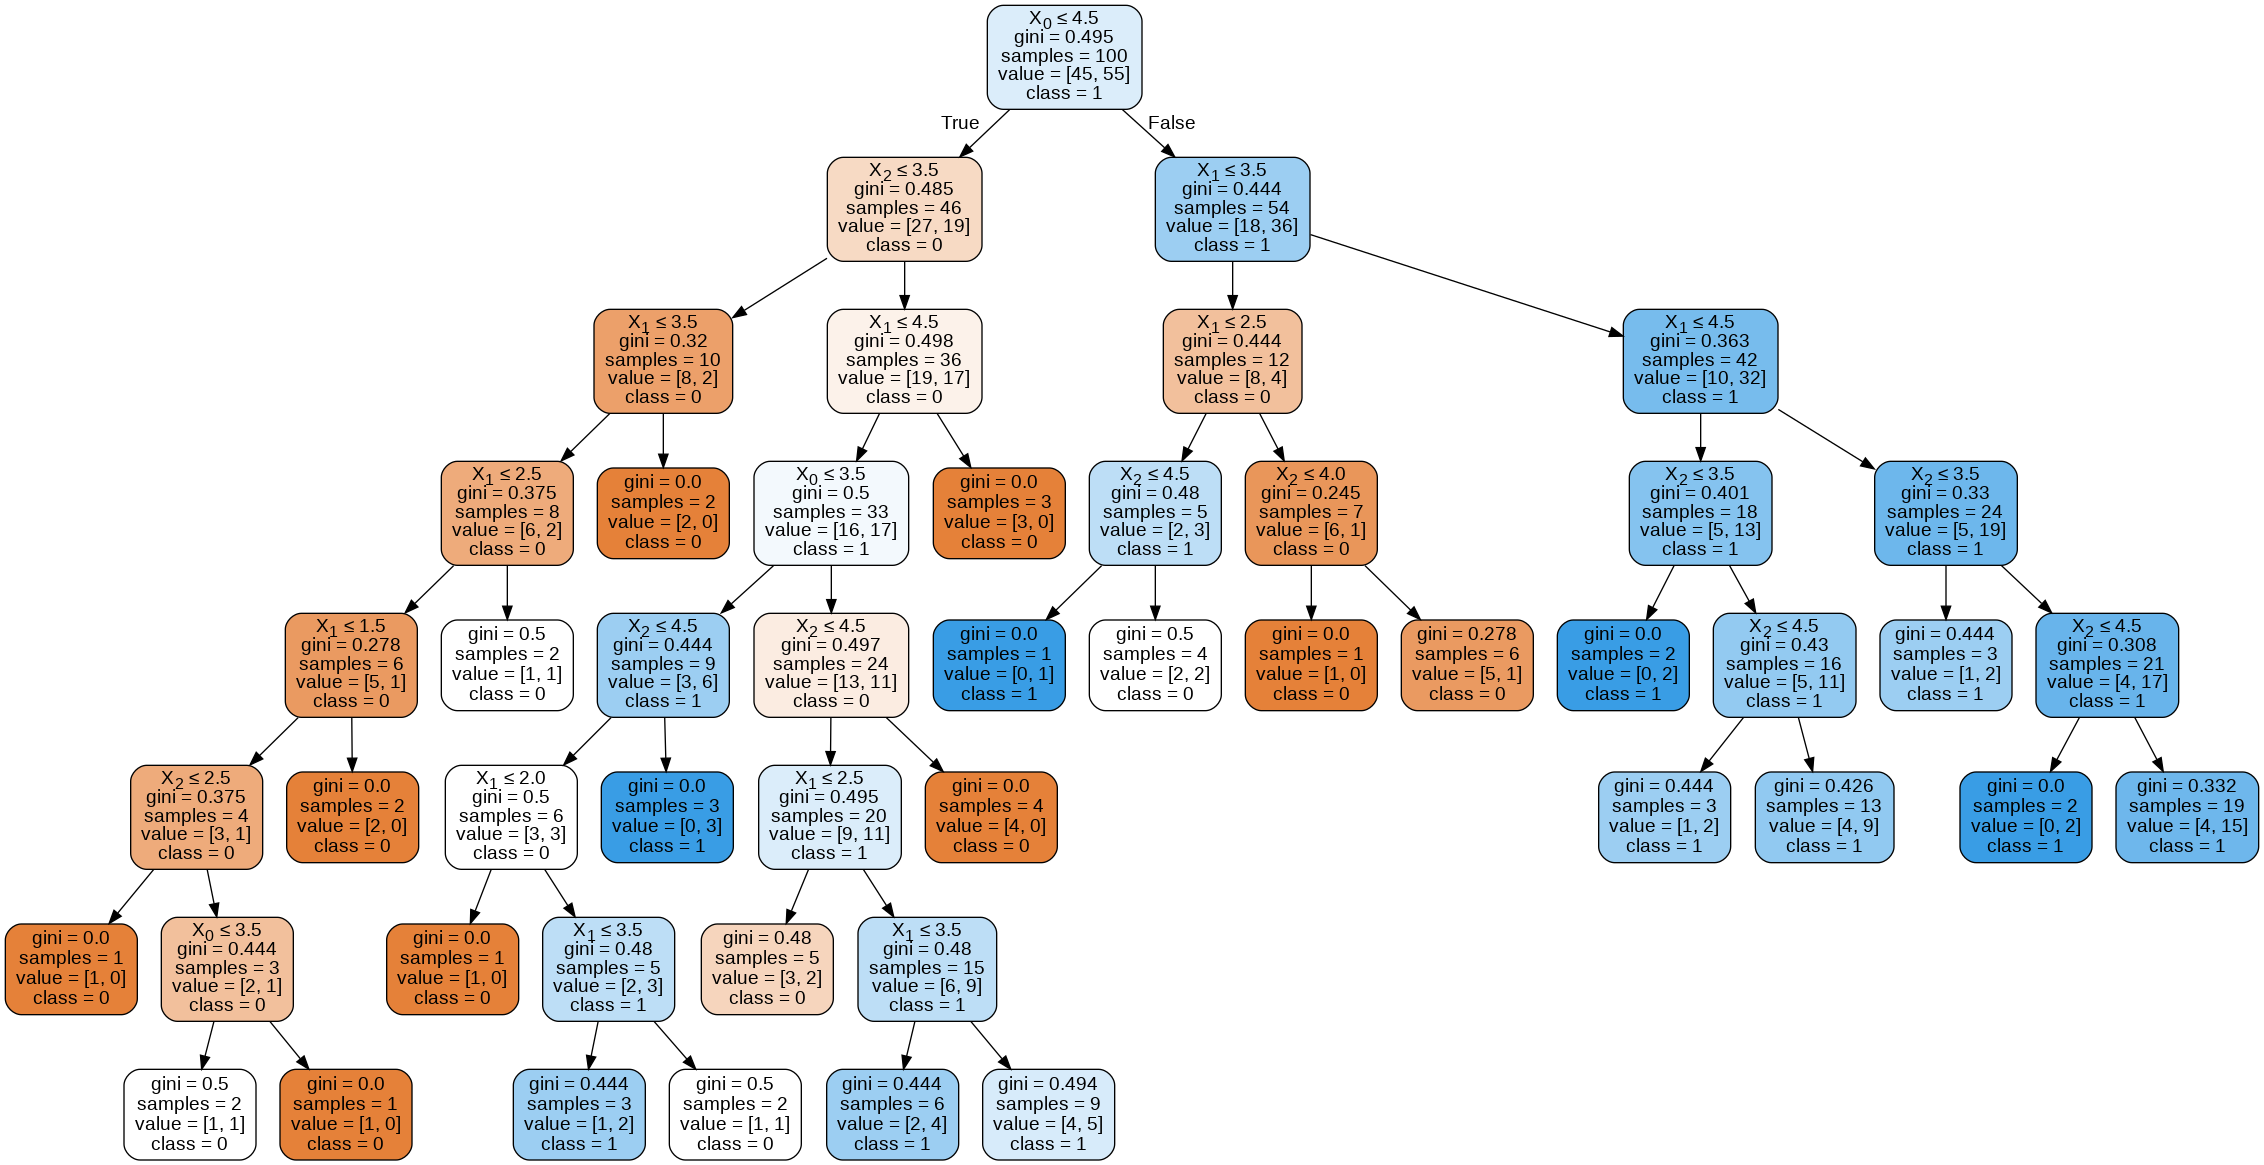

In [22]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('customer.png')
Image(graph.create_png())

In [10]:
indep=data.Y
dep=data.drop(['Y','X2','X3','X4'],axis=1)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dep, indep, test_size=0.20, random_state=1,shuffle=True,stratify=y)

In [24]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=6,max_features='auto',random_state=1)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.78      1.00      0.88        14

    accuracy                           0.85        26
   macro avg       0.89      0.83      0.84        26
weighted avg       0.88      0.85      0.84        26



Accuracy is %85. Presicion and recall values are good enough. Presicion is a ratio of true positives to all positive preditions. This means that the model predict unhappy customers truly. %78 of prediction of happy custemers within all happy customer predictions(True and False) is predicted precisely. Recall is the ratio of true positives to sum of true predictions( True positive and False negative). Recall is also known as sensitivity.
 Precision score of 1.0 for a class 0 means that every item labelled as belonging to class 0 does indeed belong to class 0 whereas a recall of 1.0 means that every item from class 1 was labelled as belonging to class 1.

In [15]:
clf2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

The parameter ***entropy*** is for information gain.
The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain.